<a href="https://www.kaggle.com/code/gabrieleleonel/gabriele-leonel-classificacao-acidentes-aereos?scriptVersionId=108782102" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Gabriele Leonel CP3003515
# O objetivo deste notebook é Classificar e identificar anualmente a quantidade de acidentes e o indice de fatalidade anualmente

import numpy as np
import pandas as pd 
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Leitura do dataset
originalData = pd.read_csv('/kaggle/input/airplane-crashes-and-fatalities/Airplane_Crashes_and_Fatalities_Since_1908.csv')

#Print das 10 primeiras linhas
originalData.head(10)

# Obtendo a quantidade de linhas e a quantidade de atributos
#print(f'O DataFrame possui {data.shape[0]} linhas/observações/registros e {data.shape[1]} colunas/atributos/variáveis.')


,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [2]:
#Limpando o dataframe para apenas os dados que iremos utilizar [index,date,location,aboard,fatalities,ground,summary]
data = originalData.copy()
colunasRemovidas = ['Time','Operator','Flight #','Route','Type','Registration','cn/In']

for i in colunasRemovidas:
    data = data.drop(columns=[i])

# Desta forma agora temos apenas 6 colunas
data.head()

,index,Date,Location,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,Over the North Sea,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
#Quebrando a data em dia/mes/ano para filtramos individualmente caso necessário
data.Date = pd.to_datetime(data.Date)
data.head()

,index,Date,Location,Aboard,Fatalities,Ground,Summary
0,0,1908-09-17,"Fort Myer, Virginia",2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,1912-07-12,"AtlantiCity, New Jersey",5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,1913-08-06,"Victoria, British Columbia, Canada",1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,1913-09-09,Over the North Sea,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,1913-10-17,"Near Johannisthal, Germany",30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


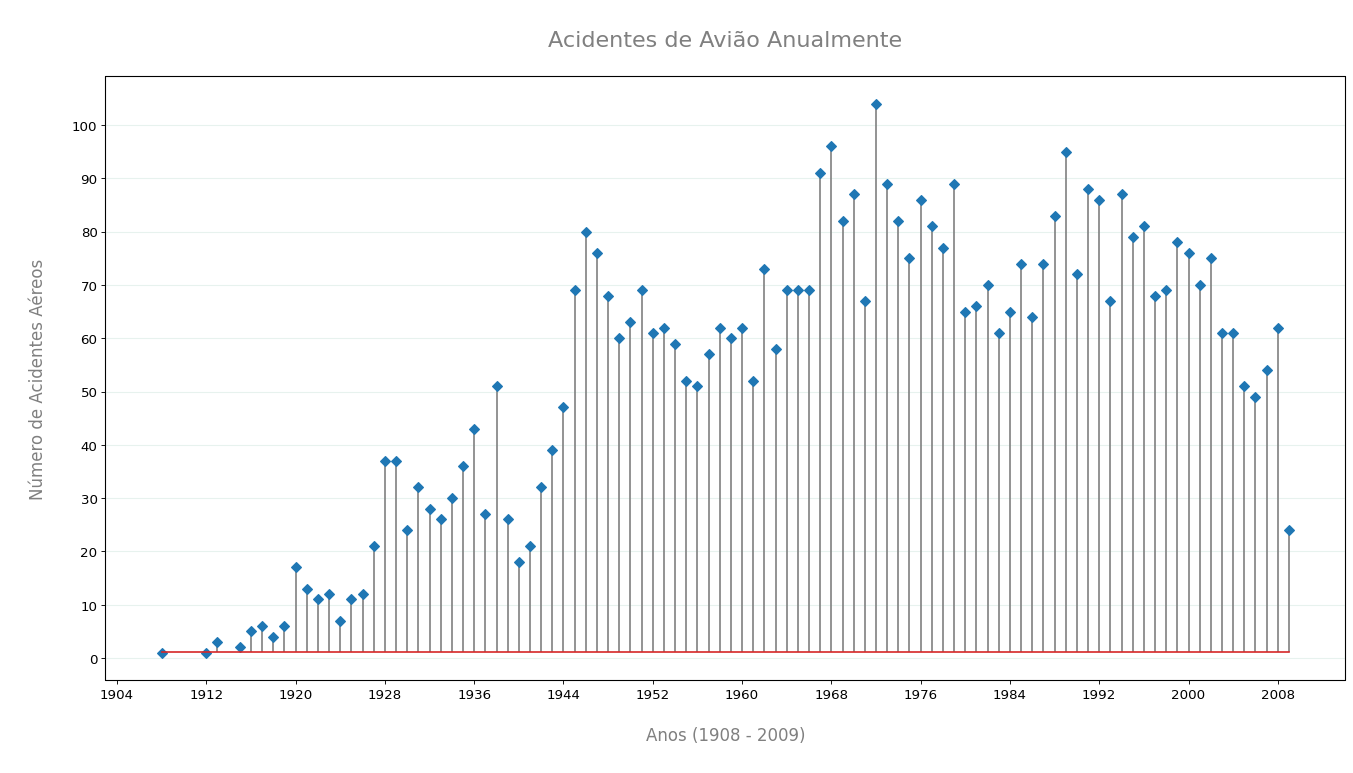

In [4]:
#Filtrando e Plotando o número de acidentes por ano
QuantidadeAcidentesAnualmenteDataframe = data.copy()
QuantidadeAcidentesAnualmenteDataframe['Year'] = pd.DatetimeIndex(QuantidadeAcidentesAnualmenteDataframe['Date']).year
QuantidadeAcidentesAnualmente=QuantidadeAcidentesAnualmenteDataframe.groupby('Year')[['index']].count()
contagemAcidentes=QuantidadeAcidentesAnualmente['index'].tolist()
QuantidadeAcidentesAnualmente['Quantidade_Acidentes'] = QuantidadeAcidentesAnualmente

fig, ax = plt.subplots(figsize = (20,10), dpi = 80)

plt.stem(QuantidadeAcidentesAnualmente.index, QuantidadeAcidentesAnualmente.Quantidade_Acidentes, linefmt='grey', markerfmt='D', bottom=1.1, use_line_collection=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=8.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10.0))

plt.title('\nAcidentes de Avião Anualmente\n', size=20, color='grey')
plt.ylabel('\nNúmero de Acidentes Aéreos\n', fontsize=15, color='grey')
plt.xlabel('\nAnos (1908 - 2009)\n', fontsize=15, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_facecolor((1, 1, 1))
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')

#plt.grid(visible=False, axis='both')
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

plt.show()

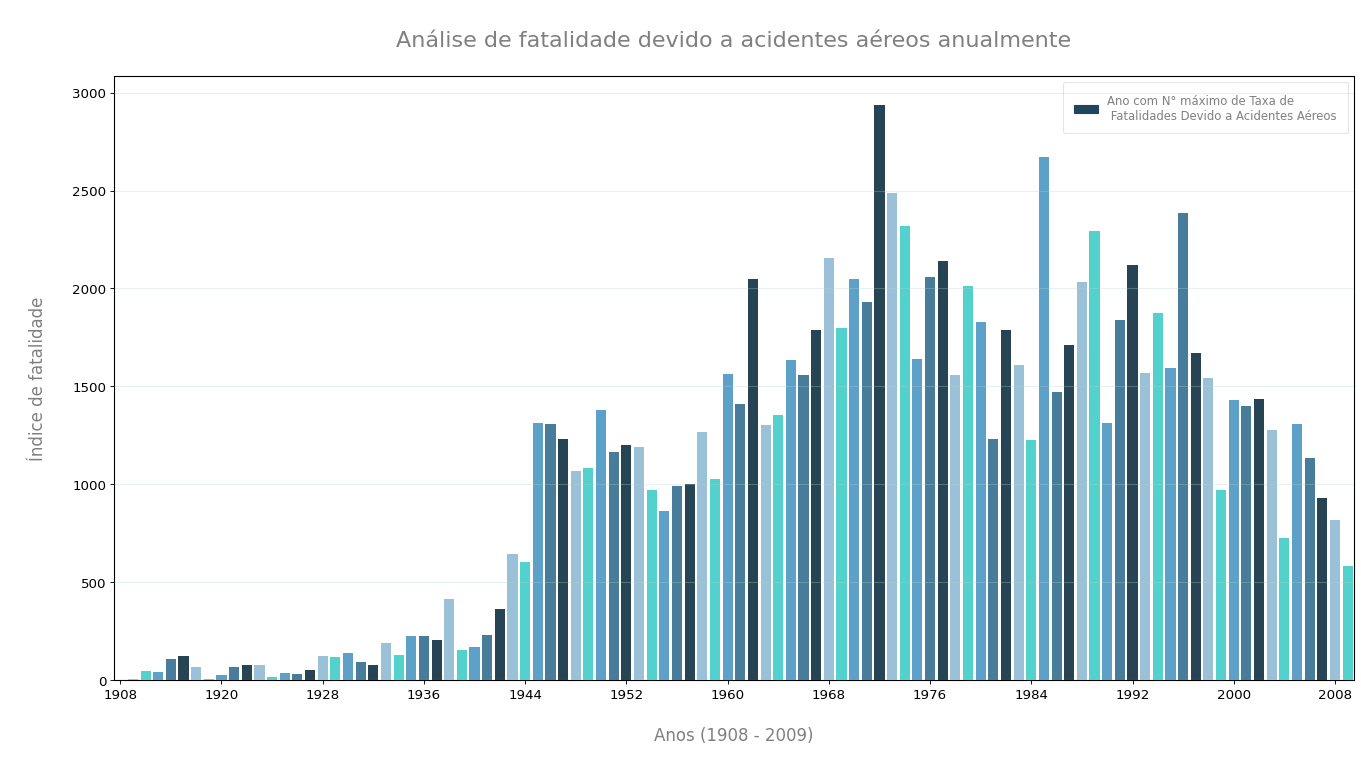

In [5]:
import seaborn as sns

# Taxa média de mortalidade devido a acidentes aéreos todos os anos
TaxaMediaMotalidadeAnual = QuantidadeAcidentesAnualmenteDataframe.groupby('Year')[['Fatalities']].mean().round(decimals = 1)

#Taxa de mortalidade devido a acidentes aéreos todos os anos
TaxaMediaMotalidadeAnual = QuantidadeAcidentesAnualmenteDataframe.groupby('Year')[['Fatalities']].sum().round(decimals = 1)

fig, ax = plt.subplots(figsize = (20,10), dpi = 80)
ax = sns.barplot(y=TaxaMediaMotalidadeAnual['Fatalities'], x=QuantidadeAcidentesAnualmente.index, palette=['#1F465C', '#90C4E1', '#3ee6e0', '#4BA6DB','#3980A8'])

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=8.0))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=500.0))

plt.title('\nAnálise de fatalidade devido a acidentes aéreos anualmente\n', size=20, color='grey')
plt.ylabel('\nÍndice de fatalidade\n', fontsize=15, color='grey')
plt.xlabel('\nAnos (1908 - 2009)\n', fontsize=15, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_facecolor((1, 1, 1))
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1')

MAX = mpatches.Patch(color='#1F465C', label='Ano com N° máximo de Taxa de\n Fatalidades Devido a Acidentes Aéreos')
ax.legend(handles=[MAX], prop={'size': 10.5}, loc='best', edgecolor='black', borderpad=1, framealpha=0.1, labelcolor='grey');

ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
plt.show()